In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [35]:
df = pd.read_csv('data_science_job.csv')

In [36]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB


In [38]:
df.isnull().mean() * 100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [39]:
le = LabelEncoder()
df['city'] = le.fit_transform(df['city'])
df['gender'] = le.fit_transform(df['gender'])
df['relevent_experience'] = le.fit_transform(df['relevent_experience'])
df['enrolled_university'] = le.fit_transform(df['enrolled_university'])
df['education_level'] = le.fit_transform(df['education_level'])
df['major_discipline'] = le.fit_transform(df['major_discipline'])
df['company_size'] = le.fit_transform(df['company_size'])
df['company_type'] = le.fit_transform(df['company_type'])
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,5,0.920,1,0,2,0,5,20.0,8,6,36.0,1.0
1,29725,77,0.776,1,1,2,0,5,15.0,4,5,47.0,0.0
2,11561,64,0.624,3,1,0,0,5,5.0,8,6,83.0,0.0
3,33241,14,0.789,3,1,3,0,1,0.0,8,5,52.0,1.0
4,666,50,0.767,1,0,2,2,5,20.0,4,1,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,55,0.878,1,1,2,0,2,14.0,8,6,42.0,1.0
19154,31398,5,0.920,1,0,2,0,5,14.0,8,6,52.0,1.0
19155,24576,5,0.920,1,0,2,0,5,20.0,4,5,44.0,0.0
19156,5756,94,0.802,1,0,2,1,6,0.0,5,5,97.0,0.0


In [40]:
iterative = IterativeImputer()
df = iterative.fit_transform(df)
df

array([[8.9490e+03, 5.0000e+00, 9.2000e-01, ..., 6.0000e+00, 3.6000e+01,
        1.0000e+00],
       [2.9725e+04, 7.7000e+01, 7.7600e-01, ..., 5.0000e+00, 4.7000e+01,
        0.0000e+00],
       [1.1561e+04, 6.4000e+01, 6.2400e-01, ..., 6.0000e+00, 8.3000e+01,
        0.0000e+00],
       ...,
       [2.4576e+04, 5.0000e+00, 9.2000e-01, ..., 5.0000e+00, 4.4000e+01,
        0.0000e+00],
       [5.7560e+03, 9.4000e+01, 8.0200e-01, ..., 5.0000e+00, 9.7000e+01,
        0.0000e+00],
       [2.3834e+04, 9.5000e+01, 8.5500e-01, ..., 6.0000e+00, 1.2700e+02,
        0.0000e+00]])

In [41]:
df = pd.DataFrame(df, columns=['enrollee_id','city','city_development_index','gender','relevent_experience','enrolled_university','education_level','major_discipline','experience','company_size','company_type','training_hours','target'])
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949.0,5.0,0.920,1.0,0.0,2.0,0.0,5.0,20.0,8.0,6.0,36.0,1.0
1,29725.0,77.0,0.776,1.0,1.0,2.0,0.0,5.0,15.0,4.0,5.0,47.0,0.0
2,11561.0,64.0,0.624,3.0,1.0,0.0,0.0,5.0,5.0,8.0,6.0,83.0,0.0
3,33241.0,14.0,0.789,3.0,1.0,3.0,0.0,1.0,0.0,8.0,5.0,52.0,1.0
4,666.0,50.0,0.767,1.0,0.0,2.0,2.0,5.0,20.0,4.0,1.0,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386.0,55.0,0.878,1.0,1.0,2.0,0.0,2.0,14.0,8.0,6.0,42.0,1.0
19154,31398.0,5.0,0.920,1.0,0.0,2.0,0.0,5.0,14.0,8.0,6.0,52.0,1.0
19155,24576.0,5.0,0.920,1.0,0.0,2.0,0.0,5.0,20.0,4.0,5.0,44.0,0.0
19156,5756.0,94.0,0.802,1.0,0.0,2.0,1.0,6.0,0.0,5.0,5.0,97.0,0.0


In [42]:
X = df.drop(columns=['target'])
y = df['target']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
X_train.shape, X_test.shape

((15326, 12), (3832, 12))

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


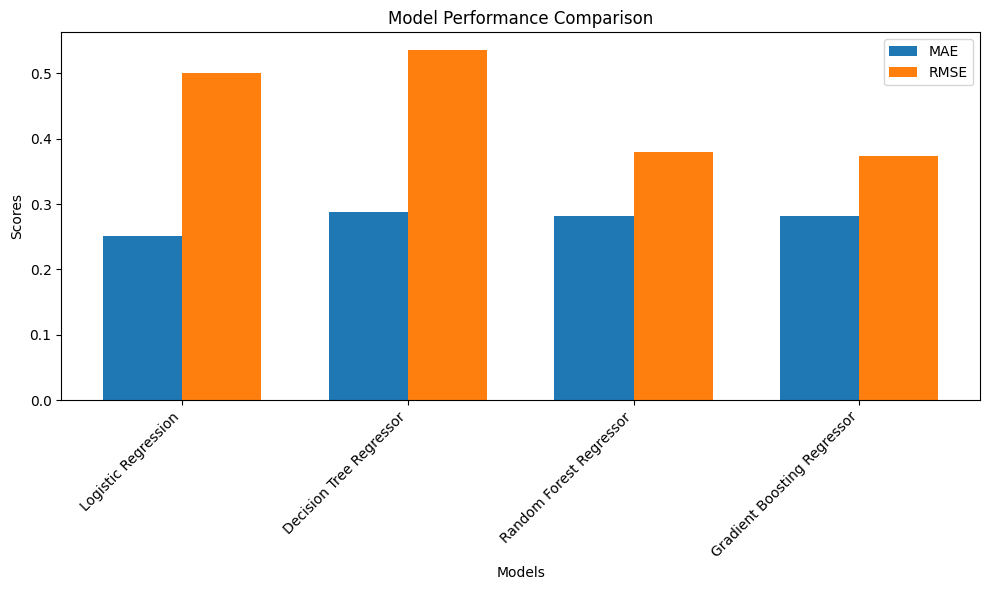

In [44]:
# Fit and predict with models
models = [('Logistic Regression', lr), ('Decision Tree Regressor', dt_reg), ('Random Forest Regressor', rf_reg), ('Gradient Boosting Regressor', gb_reg)]

# Lists to store metric values for each model
mae_values = []
rmse_values = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    mae_values.append(mae)
    rmse_values.append(rmse)

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(models))
width = 0.35

ax.bar(x - width/2, mae_values, width, label='MAE')
ax.bar(x + width/2, rmse_values, width, label='RMSE')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels([name for name, _ in models], rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()